# Support Vector Machine (SVM) Method

In [1]:
### SVM
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
ops.reset_default_graph()

In [2]:
# Load the data
#E1 data
#features = np.loadtxt("features_all.txt", delimiter=",")
#labels = np.loadtxt("labels_all.txt", delimiter=",")
#E2data
features = np.loadtxt("features_all_2.txt", delimiter=",")
labels = np.loadtxt("labels_all_2.txt", delimiter=",")
x_all = features
#y_all = labels
y_all = np.array([1 if y == 0 else -1 for y in labels])
# normalize
x_all = (x_all - x_all.min(0)) / x_all.ptp(0)
#Split the data in train & test
x_vals_train, x_vals_test, y_vals_train, y_vals_test = train_test_split(x_all, y_all)

### Define SVM process function

In [3]:
def svm_process(x_vals_train, x_vals_test):
    # Declare batch size
    sess = tf.Session()
    batch_size = 100
    epochs = 10000
    learning_parameter = 0.05
    # Initialize placeholders
    x_data = tf.placeholder(shape=[None, x_vals_train.shape[1]], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

    # Create variables for linear regression
    A = tf.Variable(tf.random_normal(shape=[x_vals_train.shape[1], 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))

    # Declare model operations
    model_output = tf.subtract(tf.matmul(x_data, A), b)

    # Declare vector L2 'norm' function squared
    l2_norm = tf.reduce_sum(tf.square(A))

    # Declare loss function
    # Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
    # L2 regularization parameter, alpha
    alpha = tf.constant([0.00])
    # Margin term in loss
    classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
    # Put terms together
    loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

    # Declare prediction function
    prediction = tf.sign(model_output)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

    # Declare optimizer
    my_opt = tf.train.GradientDescentOptimizer(learning_parameter)
    train_step = my_opt.minimize(loss)

    # Initialize variables
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training loop
    loss_vec = []
    train_accuracy = []
    test_accuracy = []

    for i in range(epochs):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])

        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)

        train_acc_temp = sess.run(accuracy, feed_dict={
            x_data: x_vals_train,
            y_target: np.transpose([y_vals_train])})
        train_accuracy.append(train_acc_temp)

        test_acc_temp = sess.run(accuracy, feed_dict={
            x_data: x_vals_test,
            y_target: np.transpose([y_vals_test])})
        test_accuracy.append(test_acc_temp)

        if (i + 1) % 1000 == 0:
                #print('Step #{} A = {}, b = {}'.format(
                #    str(i+1),
                #    str(sess.run(A)),
                #    str(sess.run(b))
                #))
            print('Loss = ' + str(temp_loss))  

    # Plot train/test accuracies
    train_accuracy = np.array(train_accuracy)
    test_accuracy = np.array(test_accuracy)
    #train_accuracy = np.reshape(train_accuracy,(rep, epochs))
    #test_accuracy = np.reshape(test_accuracy,(rep, epochs))
    #train_accuracy = np.mean(train_accuracy, axis = 0)
    #test_accuracy = np.mean(test_accuracy, axis = 0)
    print("Training accuracy",train_accuracy[len(train_accuracy)-1])
    print("Testing accuracy",test_accuracy[len(test_accuracy)-1])
    plt.plot(train_accuracy, 'k-', label='Training Accuracy')
    plt.plot(test_accuracy, 'r--', label='Test Accuracy')
    plt.title('Train and Test Set Accuracies')
    plt.xlabel('Generation')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    # Plot loss over time
    plt.plot(loss_vec, 'k-')
    plt.title('Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.show()          

Loss = [0.33803627]
Loss = [0.25451046]
Loss = [0.2127562]
Loss = [0.12974887]
Loss = [0.17854317]
Loss = [0.1300879]
Loss = [0.16367958]
Loss = [0.06554885]
Loss = [0.0887384]
Loss = [0.04262022]
Training accuracy 0.9810649
Testing accuracy 0.98288625


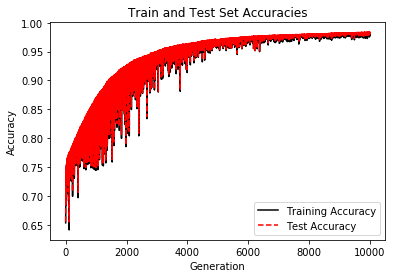

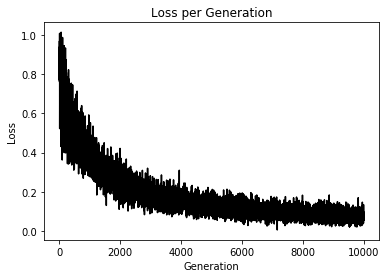

In [4]:
svm_process(x_vals_train = x_vals_train, x_vals_test = x_vals_test)

### PCA + SVM

Loss = [0.42106196]
Loss = [0.22035451]
Loss = [0.18426254]
Loss = [0.13422115]
Loss = [0.1771789]
Loss = [0.08647615]
Loss = [0.09589256]
Loss = [0.06351347]
Loss = [0.06987075]
Loss = [0.03285255]
Training accuracy 0.97948694
Testing accuracy 0.97232676


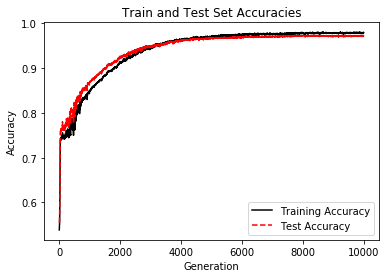

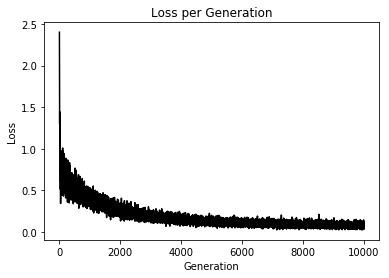

In [4]:
n = 40
model = PCA(n_components = n, random_state = 1234)
model.fit(x_vals_train)
x_vals_train_pca = model.transform(x_vals_train)
model = PCA(n_components=n)
model.fit(x_vals_test)
x_vals_test_pca = model.transform(x_vals_test)
svm_process(x_vals_train = x_vals_train_pca, x_vals_test = x_vals_test_pca)